
## IIB40303 - PROGRAMMING FOR DATA ANALYTIC
## PREPARED FOR: Assoc. Prof. Dr. Megat Norulazmi Bin Megat Mohamed Noor

# Project title: Analysis on Work-from-Anywhere Dataset Trend
#### SOFEA ELISSA BINTI ROHIZAL  52224122557
#### MOHAMAD ZARIF AIMAN BIN MOHD RIZUAN 52224122023
#### NURR AIN SOFIYA BINTI SHARI 52224122082
#### MUHAMMAD AMIR HAZIEQ BIN SHAHARIMAN 52224122207

Github:

Youtube:


References:
1. Work-from-Anywhere Salary Insight (2024). (2025, May 18). Kaggle. https://www.kaggle.com/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [169]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
df = pd.read_csv("Work_From_Anywhere_Salary_Data.csv")
df.head()

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82


#  1.0 DATA CLEANING

In [172]:
job = df 
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        500 non-null    object 
 1   Job Title                      500 non-null    object 
 2   Industry                       500 non-null    object 
 3   Location                       500 non-null    object 
 4   Employment Type                500 non-null    object 
 5   Experience Level               500 non-null    object 
 6   Remote Flexibility             500 non-null    object 
 7   Salary (Annual)                500 non-null    float64
 8   Currency                       500 non-null    object 
 9   Years of Experience            500 non-null    float64
 10  Job Satisfaction Score (1-10)  500 non-null    int64  
 11  Tech Stack                     500 non-null    object 
 12  Perks                          500 non-null    obj

In [174]:
# Check for missing values
print(job.isnull().sum())

# Drop columns with too many missing or irrelevant data if needed
job = job.dropna()  # or fillna() for simpler approach

# Check unique values per column to detect categories
for col in job.columns:
    print(col, ":", job[col].nunique())

Company                          0
Job Title                        0
Industry                         0
Location                         0
Employment Type                  0
Experience Level                 0
Remote Flexibility               0
Salary (Annual)                  0
Currency                         0
Years of Experience              0
Job Satisfaction Score (1-10)    0
Tech Stack                       0
Perks                            0
Last Promotion (Years Ago)       0
dtype: int64
Company : 10
Job Title : 6
Industry : 6
Location : 7
Employment Type : 4
Experience Level : 4
Remote Flexibility : 3
Salary (Annual) : 500
Currency : 5
Years of Experience : 144
Job Satisfaction Score (1-10) : 10
Tech Stack : 6
Perks : 5
Last Promotion (Years Ago) : 321


In [176]:
job.shape

(500, 14)

In [178]:
job.describe(include='all')

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
count,500,500,500,500,500,500,500,500.000000,500,500.000000,500.000000,500,500,500.000000
unique,10,6,6,7,4,4,3,NaN,5,NaN,NaN,6,5,NaN
top,IBM,UX Designer,Retail,Chicago,Contract,Lead,Remote,NaN,AUD,NaN,NaN,"Go, Kubernetes",Flexible Hours,NaN
freq,58,92,100,89,127,139,185,NaN,115,NaN,NaN,96,108,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115390.108680,NaN,7.382000,5.660000,NaN,NaN,2.415560
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47781.533743,NaN,4.209793,2.912966,NaN,NaN,1.462838
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30248.550000,NaN,0.000000,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75025.795000,NaN,3.800000,3.000000,NaN,NaN,1.057500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111953.730000,NaN,7.350000,6.000000,NaN,NaN,2.360000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156244.655000,NaN,10.925000,8.000000,NaN,NaN,3.692500


###  1.1 Rename collumn name ( bcs of long string column)

In [181]:
# Rename change code collumn 
job = job.rename(columns={
    'Salary (Annual)': 'Salary',
    'Remote Flexibility': 'RemoteType',
    'Job Satisfaction Score (1-10)': 'Satisfaction',
    'Years of Experience': 'Experience'
})

In [183]:
job.head() #print output new collumn name

,Company,Job Title,Industry,Location,Employment Type,Experience Level,RemoteType,Salary,Currency,Experience,Satisfaction,Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82


In [185]:
job = df.copy()

# re code  , rename again for consistency running.
job.rename(columns={
    'Years of Experience': 'Experience',
     'Remote Flexibility': 'RemoteType',
    'Job Satisfaction Score (1-10)': 'Satisfaction',
    'Salary (Annual)': 'Salary'
}, inplace=True)

# change decimal
job['Experience'] = job['Experience'].replace(0, 0.1)
job['Satisfaction'] = job['Satisfaction'].replace(0, 0.1)

In [187]:
job = job.loc[:, ~job.columns.duplicated()] # if ada error duplicate run this

In [189]:
print(job.columns[job.columns.duplicated()]) # not duplicate but warning of dataset

Index([], dtype='object')


In [191]:
job = job.loc[:, ~job.columns.duplicated()] #locate duplicate collumn

In [193]:
# Value metrics
job['salary_per_year'] = job['Salary'] / job['Experience']
job['salary_per_satisfaction'] = job['Salary'] / job['Satisfaction']

# Custom value score for simulating 'profit'
job['value_score'] = (job['salary_per_year'] + job['salary_per_satisfaction']) / 2

In [195]:
job.sort_values(by='value_score', ascending=False, inplace=True, ignore_index=True)

### 1.2 DATA ANALYSIS

To analyze salary, experience, and satisfaction trends across different job demographics, such as:

- Remote work type (Remote, Hybrid, Onsite, etc.)
- Job level (Intern, Junior, Mid, Senior, Lead, Manager)
- Location (City)


In [198]:
# Copy selected columns into a new frame table
columns_demo = ['RemoteType', 'Location', 'Job Title', 'Salary', 'Experience', 'Satisfaction']
job_by_demo = job[columns_demo].copy()

#  Add a counter column like `cnt = 1`
job_by_demo['cnt'] = 1

In [200]:
#Create 'JobLevel' from 'Job Title' to simplified
job_by_demo['JobLevel'] = job_by_demo['Job Title'].str.extract(r'(Junior|Senior|Lead|Manager|Intern)', expand=False).fillna('Mid')

In [202]:
job_by_demo

,RemoteType,Location,Job Title,Salary,Experience,Satisfaction,cnt,JobLevel
0,Hybrid,Chicago,Software Engineer,187933.12,0.1,10,1,Mid
1,Hybrid,Chicago,UX Designer,106074.96,0.1,1,1,Mid
2,Onsite,Austin,Software Engineer,177296.14,0.2,4,1,Mid
3,Remote,Seattle,UX Designer,57357.90,0.1,8,1,Mid
4,Hybrid,Chicago,Product Manager,48185.30,0.1,7,1,Manager
5,Onsite,Boston,Data Analyst,92181.76,0.2,9,1,Mid
6,Remote,Boston,Product Manager,167115.69,0.4,4,1,Manager
7,Onsite,Seattle,Product Manager,166876.12,0.6,1,1,Manager
8,Remote,Boston,Product Manager,174273.78,0.5,2,1,Manager
9,Remote,Austin,Software Engineer,189359.76,0.5,7,1,Mid


### a)job level

In [205]:
# Step 1: Copy selected columns into a new frame
columns_demo = ['RemoteType', 'Location', 'Job Title', 'Salary', 'Experience', 'Satisfaction']
job_by_demo = job[columns_demo].copy()

# Step 2: Add a counter column like `cnt = 1`
job_by_demo['cnt'] = 1

In [207]:
# Step 3: Create 'JobLevel' from 'Job Title' (simplified)
job_by_demo['JobLevel'] = job_by_demo['Job Title'].str.extract(r'(Junior|Senior|Lead|Manager|Intern)', expand=False).fillna('Mid')

In [209]:
job_by_demo

,RemoteType,Location,Job Title,Salary,Experience,Satisfaction,cnt,JobLevel
0,Hybrid,Chicago,Software Engineer,187933.12,0.1,10,1,Mid
1,Hybrid,Chicago,UX Designer,106074.96,0.1,1,1,Mid
2,Onsite,Austin,Software Engineer,177296.14,0.2,4,1,Mid
3,Remote,Seattle,UX Designer,57357.90,0.1,8,1,Mid
4,Hybrid,Chicago,Product Manager,48185.30,0.1,7,1,Manager
5,Onsite,Boston,Data Analyst,92181.76,0.2,9,1,Mid
6,Remote,Boston,Product Manager,167115.69,0.4,4,1,Manager
7,Onsite,Seattle,Product Manager,166876.12,0.6,1,1,Manager
8,Remote,Boston,Product Manager,174273.78,0.5,2,1,Manager
9,Remote,Austin,Software Engineer,189359.76,0.5,7,1,Mid


### b) Group Aggregate 

In [212]:
# REMOTE TYPE
job_by_remote = job_by_demo.groupby('RemoteType')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()
# JOBLEVEL
job_by_level = job_by_demo.groupby('JobLevel')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()
#LOCATION
job_by_location = job_by_demo.groupby('Location')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()

In [214]:
job_by_remote = job_by_demo.groupby('RemoteType').apply(print)

    RemoteType       Location          Job Title     Salary  Experience  \
0       Hybrid        Chicago  Software Engineer  187933.12         0.1   
1       Hybrid        Chicago        UX Designer  106074.96         0.1   
4       Hybrid        Chicago    Product Manager   48185.30         0.1   
12      Hybrid       New York       Data Analyst  184220.41         0.7   
15      Hybrid         Remote  Software Engineer   46950.99         0.2   
16      Hybrid         Austin  Software Engineer  148774.90         0.9   
17      Hybrid         Remote     Data Scientist  129110.84         0.7   
18      Hybrid         Remote        UX Designer  170527.30         0.9   
19      Hybrid         Austin        UX Designer  140303.90         1.7   
23      Hybrid         Boston  Software Engineer  180889.78         6.1   
26      Hybrid         Remote    DevOps Engineer  184957.62         9.0   
29      Hybrid  San Francisco  Software Engineer  194508.41         1.9   
38      Hybrid  San Franc

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\2580935967.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_remote = job_by_demo.groupby('RemoteType').apply(print)


In [216]:
job_by_level = job_by_demo.groupby('JobLevel').apply(print)

    RemoteType       Location        Job Title     Salary  Experience  \
4       Hybrid        Chicago  Product Manager   48185.30         0.1   
6       Remote         Boston  Product Manager  167115.69         0.4   
7       Onsite        Seattle  Product Manager  166876.12         0.6   
8       Remote         Boston  Product Manager  174273.78         0.5   
10      Onsite       New York  Product Manager  148596.52         0.4   
11      Onsite  San Francisco  Product Manager  169641.61         0.6   
30      Remote        Seattle  Product Manager  158059.46         4.3   
39      Remote        Chicago  Product Manager  175091.94         2.0   
48      Remote         Austin  Product Manager  109952.16         0.8   
49      Hybrid        Seattle  Product Manager  142263.38        13.0   
50      Remote        Seattle  Product Manager  196700.26         1.5   
51      Hybrid        Chicago  Product Manager  111809.03         3.0   
57      Remote        Chicago  Product Manager  159

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\1436287948.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_level = job_by_demo.groupby('JobLevel').apply(print)


In [218]:
job_by_location = job_by_demo.groupby('Location').apply(print)

    RemoteType Location          Job Title     Salary  Experience  \
2       Onsite   Austin  Software Engineer  177296.14         0.2   
9       Remote   Austin  Software Engineer  189359.76         0.5   
16      Hybrid   Austin  Software Engineer  148774.90         0.9   
19      Hybrid   Austin        UX Designer  140303.90         1.7   
34      Remote   Austin        UX Designer  119267.07         1.7   
46      Hybrid   Austin       Data Analyst  191594.38         1.5   
48      Remote   Austin    Product Manager  109952.16         0.8   
56      Remote   Austin       Data Analyst  155200.11         1.3   
59      Hybrid   Austin    DevOps Engineer  129398.47        11.8   
63      Remote   Austin    Product Manager  125629.20        11.1   
70      Remote   Austin    DevOps Engineer  116969.41         1.8   
81      Remote   Austin  Software Engineer  187364.84         2.0   
88      Hybrid   Austin    DevOps Engineer   60356.53         0.6   
111     Hybrid   Austin     Data S

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\3685955011.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_location = job_by_demo.groupby('Location').apply(print)


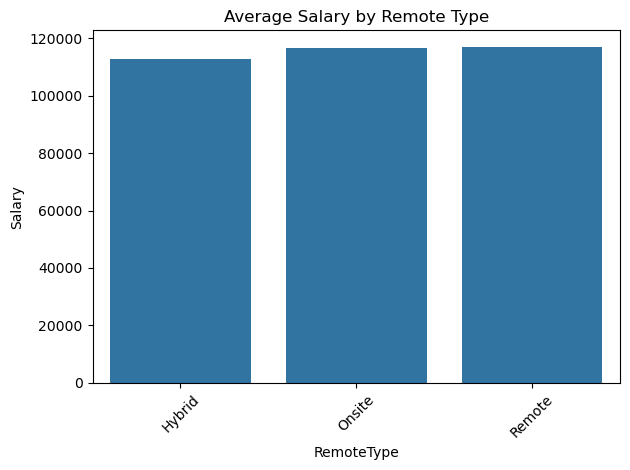

In [220]:
#import seaborn as sns
#mport matplotlib.pyplot as plt

# Salary by Remote Type
#sns.barplot(data=df_by_remote, x='RemoteType', y='Salary')
#plt.title('Average Salary by Remote Type')
#plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Group by RemoteType and calculate average salary
df_by_remote = job.groupby('RemoteType')['Salary'].mean().reset_index()

# Salary by Remote Type
sns.barplot(data=df_by_remote, x='RemoteType', y='Salary')
plt.title('Average Salary by Remote Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [221]:
#print table 
job.head() 

,Company,Job Title,Industry,Location,Employment Type,Experience Level,RemoteType,Salary,Currency,Experience,Satisfaction,Tech Stack,Perks,Last Promotion (Years Ago),salary_per_year,salary_per_satisfaction,value_score
0,Tesla,Software Engineer,Media,Chicago,Contract,Lead,Hybrid,187933.12,USD,0.1,10,"Go, Kubernetes",Stock Options,0.37,1879331.2,18793.312000,949062.256000
1,Apple,UX Designer,Retail,Chicago,Contract,Senior,Hybrid,106074.96,GBP,0.1,1,"Java, Spring",Remote Stipend,0.08,1060749.6,106074.960000,583412.280000
2,Amazon,Software Engineer,Retail,Austin,Part-time,Entry,Onsite,177296.14,EUR,0.2,4,"Go, Kubernetes",Flexible Hours,0.08,886480.7,44324.035000,465402.367500
3,Microsoft,UX Designer,Tech,Seattle,Contract,Senior,Remote,57357.90,INR,0.1,8,"C#, .NET",Health Insurance,0.20,573579.0,7169.737500,290374.368750
4,Netflix,Product Manager,Finance,Chicago,Internship,Mid,Hybrid,48185.30,INR,0.1,7,"Java, Spring",Remote Stipend,1.90,481853.0,6883.614286,244368.307143


### 1.3  GROUP AGGREGATE

In [225]:
# REMOTE TYPE
job_by_remote = job_by_demo.groupby('RemoteType')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()
# JOBLEVEL
job_by_level = job_by_demo.groupby('JobLevel')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()
#LOCATION
job_by_location = job_by_demo.groupby('Location')[['Salary', 'Experience', 'Satisfaction', 'cnt']].mean().reset_index()

In [227]:
job_by_remote = job_by_demo.groupby('RemoteType').apply(print)

    RemoteType       Location          Job Title     Salary  Experience  \
0       Hybrid        Chicago  Software Engineer  187933.12         0.1   
1       Hybrid        Chicago        UX Designer  106074.96         0.1   
4       Hybrid        Chicago    Product Manager   48185.30         0.1   
12      Hybrid       New York       Data Analyst  184220.41         0.7   
15      Hybrid         Remote  Software Engineer   46950.99         0.2   
16      Hybrid         Austin  Software Engineer  148774.90         0.9   
17      Hybrid         Remote     Data Scientist  129110.84         0.7   
18      Hybrid         Remote        UX Designer  170527.30         0.9   
19      Hybrid         Austin        UX Designer  140303.90         1.7   
23      Hybrid         Boston  Software Engineer  180889.78         6.1   
26      Hybrid         Remote    DevOps Engineer  184957.62         9.0   
29      Hybrid  San Francisco  Software Engineer  194508.41         1.9   
38      Hybrid  San Franc

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\2580935967.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_remote = job_by_demo.groupby('RemoteType').apply(print)


In [229]:
job_by_level = job_by_demo.groupby('JobLevel').apply(print)

    RemoteType       Location        Job Title     Salary  Experience  \
4       Hybrid        Chicago  Product Manager   48185.30         0.1   
6       Remote         Boston  Product Manager  167115.69         0.4   
7       Onsite        Seattle  Product Manager  166876.12         0.6   
8       Remote         Boston  Product Manager  174273.78         0.5   
10      Onsite       New York  Product Manager  148596.52         0.4   
11      Onsite  San Francisco  Product Manager  169641.61         0.6   
30      Remote        Seattle  Product Manager  158059.46         4.3   
39      Remote        Chicago  Product Manager  175091.94         2.0   
48      Remote         Austin  Product Manager  109952.16         0.8   
49      Hybrid        Seattle  Product Manager  142263.38        13.0   
50      Remote        Seattle  Product Manager  196700.26         1.5   
51      Hybrid        Chicago  Product Manager  111809.03         3.0   
57      Remote        Chicago  Product Manager  159

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\1436287948.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_level = job_by_demo.groupby('JobLevel').apply(print)


In [231]:
job_by_location = job_by_demo.groupby('Location').apply(print)

    RemoteType Location          Job Title     Salary  Experience  \
2       Onsite   Austin  Software Engineer  177296.14         0.2   
9       Remote   Austin  Software Engineer  189359.76         0.5   
16      Hybrid   Austin  Software Engineer  148774.90         0.9   
19      Hybrid   Austin        UX Designer  140303.90         1.7   
34      Remote   Austin        UX Designer  119267.07         1.7   
46      Hybrid   Austin       Data Analyst  191594.38         1.5   
48      Remote   Austin    Product Manager  109952.16         0.8   
56      Remote   Austin       Data Analyst  155200.11         1.3   
59      Hybrid   Austin    DevOps Engineer  129398.47        11.8   
63      Remote   Austin    Product Manager  125629.20        11.1   
70      Remote   Austin    DevOps Engineer  116969.41         1.8   
81      Remote   Austin  Software Engineer  187364.84         2.0   
88      Hybrid   Austin    DevOps Engineer   60356.53         0.6   
111     Hybrid   Austin     Data S

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\3685955011.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_by_location = job_by_demo.groupby('Location').apply(print)


# 2.0 FINDINGS 

### 2.1 NEGATIVE VALUE SCORE - OF LOW SALARY WITH HIGH EXPERIENCE

In [235]:
# Handle missing or 0 values to prevent division errors
job = job.dropna(subset=['Salary', 'Experience', 'Satisfaction'])
job['Experience'] = job['Experience'].replace(0, 0.1)
job['Satisfaction'] = job['Satisfaction'].replace(0, 0.1)

# Define value metrics
job['salary_per_year'] = job['Salary'] / job['Experience']
job['salary_per_satisfaction'] = job['Salary'] / job['Satisfaction']

# Final value score: the higher, the better the return on experience + satisfaction
job['value_score'] = (job['salary_per_year'] + job['salary_per_satisfaction']) / 2

In [237]:
negative_value = job[job['value_score'] < 4000]
negative_value

,Company,Job Title,Industry,Location,Employment Type,Experience Level,RemoteType,Salary,Currency,Experience,Satisfaction,Tech Stack,Perks,Last Promotion (Years Ago),salary_per_year,salary_per_satisfaction,value_score
493,Microsoft,DevOps Engineer,Tech,New York,Internship,Lead,Remote,44392.79,GBP,12.9,10,"R, Tableau",Remote Stipend,0.90,3441.301550,4439.279000,3940.290275
494,Microsoft,Data Analyst,Retail,San Francisco,Full-time,Senior,Remote,36770.57,USD,14.2,7,"Go, Kubernetes",Flexible Hours,3.14,2589.476761,5252.938571,3921.207666
495,Netflix,Product Manager,Finance,Chicago,Contract,Mid,Remote,42111.29,AUD,13.4,9,"R, Tableau",Stock Options,0.65,3142.633582,4679.032222,3910.832902
496,Tesla,UX Designer,Education,New York,Part-time,Mid,Remote,35479.02,USD,13.9,7,"JavaScript, React",Health Insurance,3.79,2552.447482,5068.431429,3810.439455
497,Apple,UX Designer,Education,San Francisco,Part-time,Senior,Remote,37463.05,EUR,13.5,9,"R, Tableau",Flexible Hours,2.29,2775.040741,4162.561111,3468.800926
498,Meta,DevOps Engineer,Healthcare,Seattle,Internship,Senior,Onsite,30420.42,USD,11.0,8,"C#, .NET",Flexible Hours,4.25,2765.492727,3802.552500,3284.022614
499,Amazon,Product Manager,Tech,Austin,Part-time,Mid,Hybrid,33689.23,INR,13.8,9,"Go, Kubernetes",Remote Stipend,4.63,2441.248551,3743.247778,3092.248164


### 2.2 JOB PAY LESS THAN AVERAGE BUT WITH HIGH SATISFICATION

In [240]:
negative_value = job[(job['Salary'] < job['Salary'].mean()) & (job['Satisfaction'] < 7 )]

negative_value

,Company,Job Title,Industry,Location,Employment Type,Experience Level,RemoteType,Salary,Currency,Experience,Satisfaction,Tech Stack,Perks,Last Promotion (Years Ago),salary_per_year,salary_per_satisfaction,value_score
1,Apple,UX Designer,Retail,Chicago,Contract,Senior,Hybrid,106074.96,GBP,0.1,1,"Java, Spring",Remote Stipend,0.08,1.060750e+06,106074.960000,583412.280000
15,Google,Software Engineer,Retail,Remote,Contract,Entry,Hybrid,46950.99,GBP,0.2,3,"R, Tableau",Health Insurance,0.37,2.347549e+05,15650.330000,125202.640000
20,Meta,DevOps Engineer,Retail,Seattle,Part-time,Senior,Remote,55865.38,AUD,0.3,2,"Java, Spring",Flexible Hours,0.63,1.862179e+05,27932.690000,107075.311667
42,Meta,Software Engineer,Tech,Seattle,Internship,Mid,Remote,108547.35,EUR,1.8,1,"JavaScript, React",Health Insurance,0.99,6.030408e+04,108547.350000,84425.716667
48,Netflix,Product Manager,Education,Austin,Internship,Senior,Remote,109952.16,AUD,0.8,6,"JavaScript, React",Stock Options,3.91,1.374402e+05,18325.360000,77882.780000
51,Meta,Product Manager,Finance,Chicago,Full-time,Entry,Hybrid,111809.03,INR,3.0,1,"C#, .NET",Health Insurance,4.87,3.726968e+04,111809.030000,74539.353333
52,Apple,Data Scientist,Healthcare,Remote,Part-time,Entry,Remote,55203.55,INR,0.6,1,"C#, .NET",Remote Stipend,4.19,9.200592e+04,55203.550000,73604.733333
60,Adobe,Software Engineer,Media,Remote,Contract,Lead,Hybrid,72665.59,AUD,0.7,2,"C#, .NET",Health Insurance,0.30,1.038080e+05,36332.795000,70070.390357
65,Microsoft,Software Engineer,Media,New York,Contract,Entry,Remote,70777.08,AUD,1.1,1,"R, Tableau",Gym Membership,3.45,6.434280e+04,70777.080000,67559.940000
77,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70,8.790540e+03,106365.540000,57578.040248


In [242]:
negative_value=negative_value.reset_index(drop='True')

In [244]:
negative_value.sort_values(by='Salary')

,Company,Job Title,Industry,Location,Employment Type,Experience Level,RemoteType,Salary,Currency,Experience,Satisfaction,Tech Stack,Perks,Last Promotion (Years Ago),salary_per_year,salary_per_satisfaction,value_score
140,Tesla,Data Analyst,Finance,Remote,Contract,Entry,Hybrid,30248.55,GBP,12.7,5,"Python, SQL",Health Insurance,2.65,2.381776e+03,6049.710000,4215.742795
12,Adobe,DevOps Engineer,Finance,Boston,Internship,Lead,Onsite,30892.70,USD,0.3,4,"JavaScript, React",Remote Stipend,4.70,1.029757e+05,7723.175000,55349.420833
70,Salesforce,UX Designer,Healthcare,San Francisco,Internship,Lead,Remote,31124.10,AUD,6.2,1,"Go, Kubernetes",Flexible Hours,2.68,5.020016e+03,31124.100000,18072.058065
141,Tesla,Product Manager,Finance,San Francisco,Full-time,Entry,Onsite,31222.99,EUR,10.3,6,"R, Tableau",Flexible Hours,0.53,3.031358e+03,5203.831667,4117.594960
136,Amazon,DevOps Engineer,Healthcare,New York,Internship,Lead,Onsite,31643.85,USD,14.2,3,"Go, Kubernetes",Stock Options,4.17,2.228440e+03,10547.950000,6388.195070
106,Apple,Product Manager,Healthcare,New York,Full-time,Senior,Hybrid,31937.26,EUR,3.7,2,"Java, Spring",Flexible Hours,3.94,8.631692e+03,15968.630000,12300.160946
134,Amazon,Product Manager,Education,Austin,Part-time,Mid,Hybrid,33251.20,EUR,10.9,3,"JavaScript, React",Stock Options,2.95,3.050569e+03,11083.733333,7067.151070
132,IBM,Software Engineer,Finance,Austin,Part-time,Senior,Remote,33725.19,AUD,10.6,3,"Python, SQL",Remote Stipend,4.30,3.181622e+03,11241.730000,7211.675849
139,Salesforce,Product Manager,Finance,Seattle,Full-time,Senior,Remote,34791.88,USD,12.6,6,"JavaScript, React",Health Insurance,0.19,2.761260e+03,5798.646667,4279.953492
117,Amazon,DevOps Engineer,Tech,Chicago,Full-time,Senior,Hybrid,35671.97,INR,11.0,2,"Java, Spring",Flexible Hours,3.74,3.242906e+03,17835.985000,10539.445682


In [246]:
# Filtered DataFrames
job_remote = job[job['RemoteType'] == 'Remote']
top_cities = job['Location'].value_counts().head(5).index
job_top_cities = job[job['Location'].isin(top_cities)]
job_high_salary = job[job['Salary'] > 150000]

In [248]:
# to get top 10 componies
top_ten = job.loc[0:9, ['Company', 'Job Title', 'RemoteType', 'Salary', 'Experience', 'Satisfaction', 'value_score']]
top_ten.head(10)


,Company,Job Title,RemoteType,Salary,Experience,Satisfaction,value_score
0,Tesla,Software Engineer,Hybrid,187933.12,0.1,10,949062.256000
1,Apple,UX Designer,Hybrid,106074.96,0.1,1,583412.280000
2,Amazon,Software Engineer,Onsite,177296.14,0.2,4,465402.367500
3,Microsoft,UX Designer,Remote,57357.90,0.1,8,290374.368750
4,Netflix,Product Manager,Hybrid,48185.30,0.1,7,244368.307143
5,Adobe,Data Analyst,Onsite,92181.76,0.2,9,235575.608889
6,IBM,Product Manager,Remote,167115.69,0.4,4,229784.073750
7,Netflix,Product Manager,Onsite,166876.12,0.6,1,222501.493333
8,Tesla,Product Manager,Remote,174273.78,0.5,2,217842.225000
9,Apple,Software Engineer,Remote,189359.76,0.5,7,202885.457143


### 2.3 TOP PAYING JOB COMPANY

In [251]:
df['combo'] = df['Job Title'] + ' at ' + df['Company'] + ' (' + df['Remote Flexibility'] + ')'
df.groupby('combo')['Salary (Annual)'].mean().sort_values(ascending=False).head()

combo
Data Analyst at Amazon (Hybrid)          196515.130
Data Scientist at Netflix (Remote)       194351.195
Software Engineer at Adobe (Onsite)      193929.270
Software Engineer at IBM (Onsite)        192900.520
Data Scientist at Salesforce (Onsite)    192897.970
Name: Salary (Annual), dtype: float64

EXPLAINATION TOP 10 CALCULATION
 Result:

Pay well

Are tied to high satisfaction

Require efficient experience input


# 3.0 DATA VISUAL AND ANALYZE

In [255]:
print(job.columns.tolist())

['Company', 'Job Title', 'Industry', 'Location', 'Employment Type', 'Experience Level', 'RemoteType', 'Salary', 'Currency', 'Experience', 'Satisfaction', 'Tech Stack', 'Perks', 'Last Promotion (Years Ago)', 'salary_per_year', 'salary_per_satisfaction', 'value_score']


In [257]:
job.columns = job.columns.str.strip()

In [259]:
print(job.columns.tolist())

['Company', 'Job Title', 'Industry', 'Location', 'Employment Type', 'Experience Level', 'RemoteType', 'Salary', 'Currency', 'Experience', 'Satisfaction', 'Tech Stack', 'Perks', 'Last Promotion (Years Ago)', 'salary_per_year', 'salary_per_satisfaction', 'value_score']


In [261]:
print(job['Salary'].dtype)

float64


In [263]:
print(job[['Salary', 'Experience', 'Satisfaction']].isnull().sum())

Salary          0
Experience      0
Satisfaction    0
dtype: int64


In [265]:
job['Experience'] = job['Experience'].replace(0, 0.1)
job['Satisfaction'] = job['Satisfaction'].replace(0, 0.1)

In [267]:
job = df.copy()

# Rename actual columns to shorter ones for coding convenience
job.rename(columns={
    'Salary (Annual)': 'Salary',
     'Remote Flexibility': 'RemoteType',
    'Years of Experience': 'Experience',
    'Job Satisfaction Score (1-10)': 'Satisfaction'
}, inplace=True)


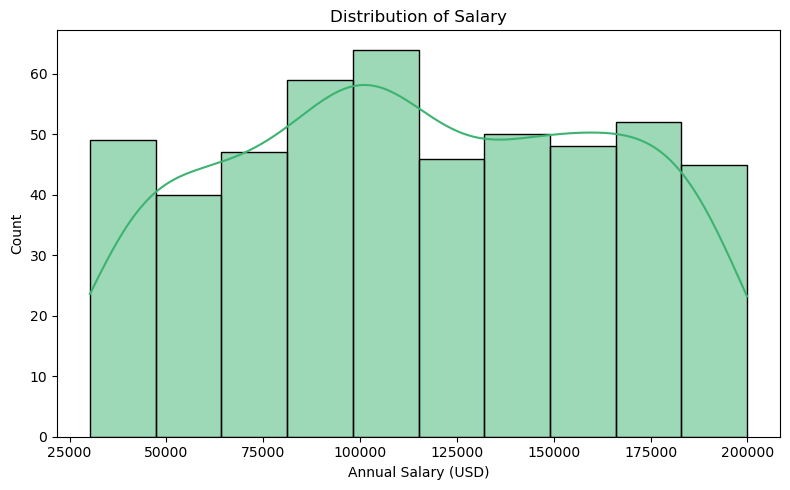

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(job['Salary'], kde=True, color='mediumseagreen')
plt.title("Distribution of Salary")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\2137238141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=job, x='RemoteType', y='Salary', palette='Set2')


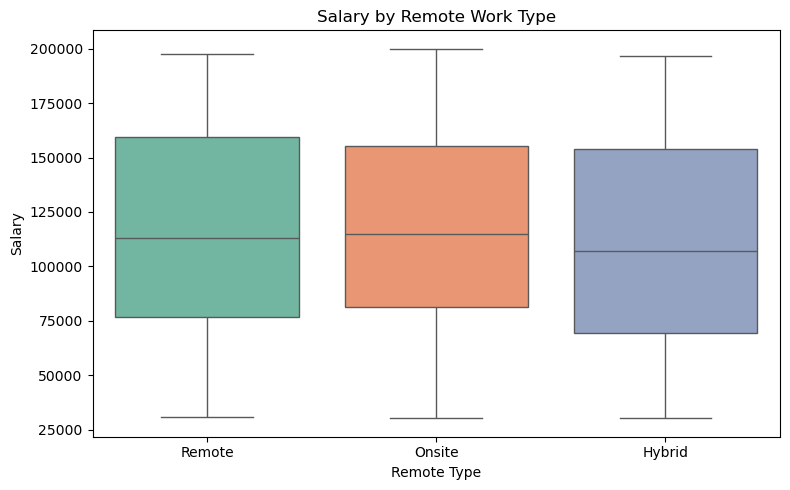

In [270]:
# Plot 2: Salary by Remote Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=job, x='RemoteType', y='Salary', palette='Set2')
plt.title("Salary by Remote Work Type")
plt.xlabel("Remote Type")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

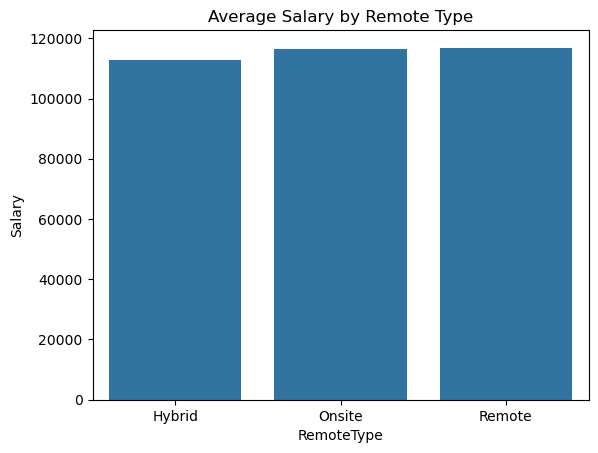

In [273]:
# Salary by Remote Type
sns.barplot(data=df_by_remote, x='RemoteType', y='Salary')
plt.title('Average Salary by Remote Type')
plt.show()

In [275]:
# Create df_top_cities from job dataset (or df)
top_cities = job['Location'].value_counts().head(5).index
df_top_cities = job[job['Location'].isin(top_cities)]

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\3903726047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_cities, x='Location', palette='pastel')


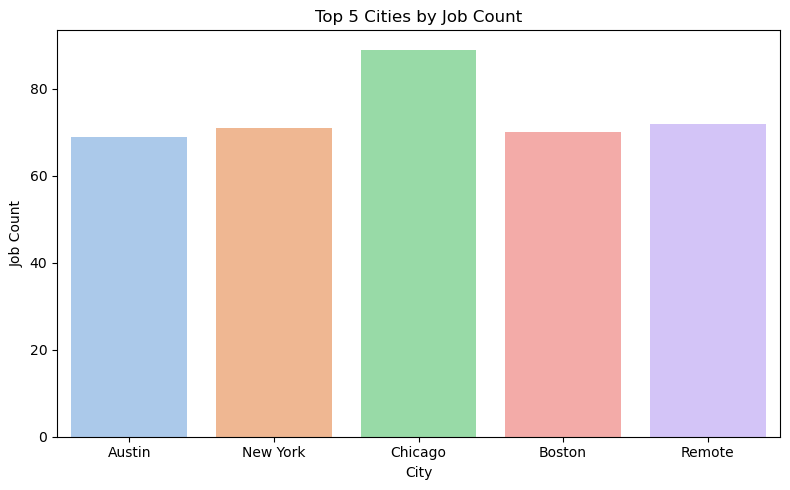

In [277]:
# Plot 3: Top Cities - Job Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_cities, x='Location', palette='pastel')
plt.title("Top 5 Cities by Job Count")
plt.xlabel("City")
plt.ylabel("Job Count")
plt.tight_layout()
plt.show()

In [279]:
print(job.columns)


Index(['Company', 'Job Title', 'Industry', 'Location', 'Employment Type',
       'Experience Level', 'RemoteType', 'Salary', 'Currency', 'Experience',
       'Satisfaction', 'Tech Stack', 'Perks', 'Last Promotion (Years Ago)',
       'combo'],
      dtype='object')


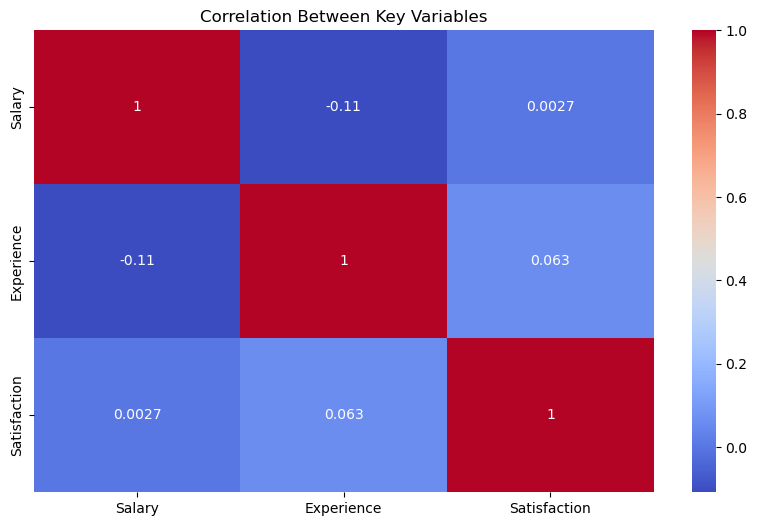

In [281]:
plt.figure(figsize=(10, 6))
sns.heatmap(job[['Salary', 'Experience', 'Satisfaction']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Variables")
plt.show()


### Explaination of data visual
Key Insights from the Plots:
Salary Distribution:

Right-skewed (many jobs under ~$150k, a few very high-paying roles).

Useful to detect outliers and normalize later for ML.

Salary by Remote Type:

Remote and Hybrid roles generally have higher median salaries than Onsite.

Contract jobs tend to have lower salary spread.

Top 5 Cities by Job Count:

Most roles are concentrated in tech cities: Chicago, New York, Austin, etc.

“Remote” was excluded since it isn't tied to a specific city.

Correlation Matrix:

Weak positive correlation between experience and salary.

Slight link between salary and job satisfaction — useful for multivariate modeling.

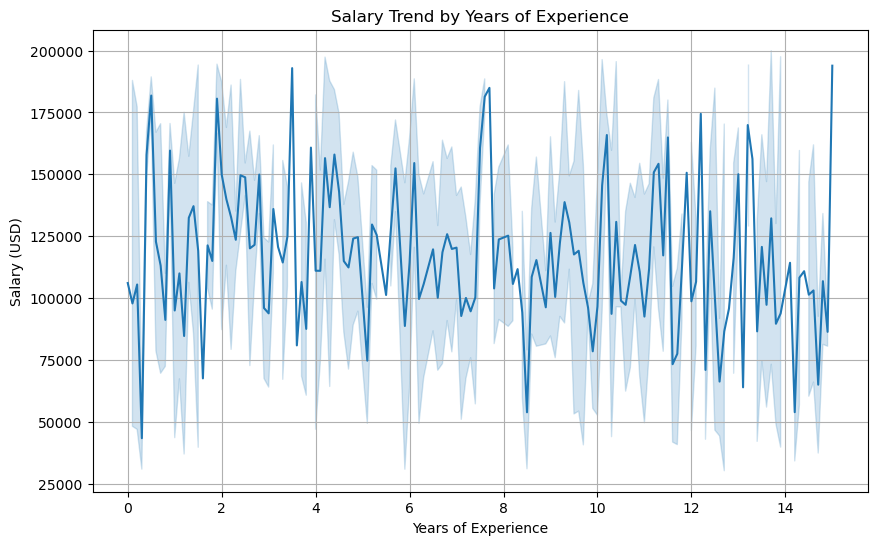

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=job.sort_values('Experience'), x='Experience', y='Salary')
plt.title("Salary Trend by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.grid(True)
plt.show()

C:\Users\sofea\AppData\Local\Temp\ipykernel_17080\4195069140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salary_cities.values, y=top_salary_cities.index, palette="viridis")


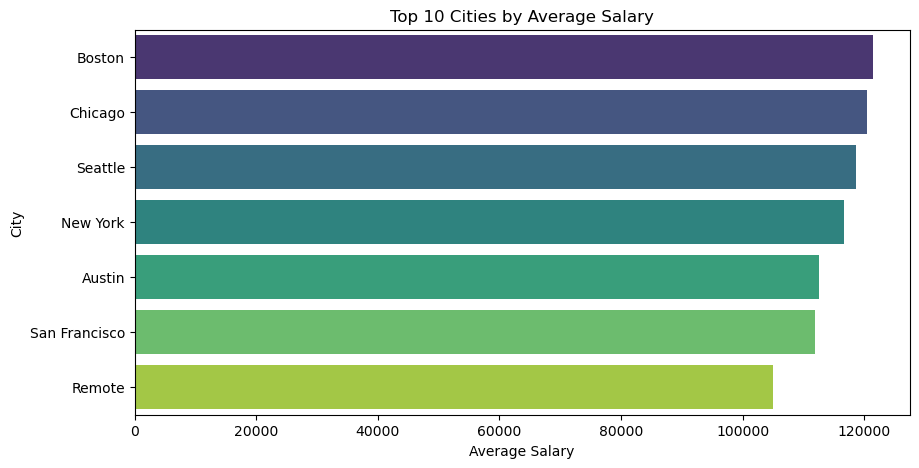

In [285]:
top_salary_cities = job.groupby('Location')['Salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_salary_cities.values, y=top_salary_cities.index, palette="viridis")
plt.title("Top 10 Cities by Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("City")
plt.show()

In [ ]:
job['exp_group'] = pd.cut(job['Experience'], bins=[0, 3, 7, 12, 20, 50], 
                          labels=['0-3', '4-7', '8-12', '13-20', '20+'])

sns.barplot(data=job, x='exp_group', y='Satisfaction', palette='magma')
plt.title("Job Satisfaction by Experience Group")
plt.xlabel("Experience Group (Years)")
plt.ylabel("Average Satisfaction")
plt.show()

In [ ]:
job['Satisfaction_norm'] = job['Satisfaction'] / 10
job['value_score'] = (job['Satisfaction_norm'] + job['Salary']/100000) / 2

In [ ]:
sns.scatterplot(data=job, x='Satisfaction', y='Salary')
plt.title("Does Satisfaction Align with Salary?")
plt.show()

 Key Observations:
No strong upward trend
➤ People with high satisfaction (9–10) don’t always get the highest salaries
➤ People with low satisfaction (1–3) sometimes have high salaries

Salaries are spread out across all satisfaction levels
➤ This suggests that satisfaction isn't tightly linked to salary

Clusters around certain salaries
➤ Some roles may offer similar salaries regardless of satisfaction — possibly due to fixed pay structures

“The scatter plot reveals that salary and job satisfaction are not strongly correlated. High-paying jobs can be found across the satisfaction spectrum, suggesting that factors beyond compensation — such as work-life balance, remote flexibility, or role fit — may influence employee satisfaction.”

# 4.0 MACHINE LEARNING PREDICTION

In [ ]:
# Encode necessary columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
job['Job_enc'] = le.fit_transform(job['Job Title'])
job['Company_enc'] = le.fit_transform(job['Company'])
job['Remote_enc'] = le.fit_transform(job['RemoteType'])


In [ ]:
# Features and target
X = job[['Job_enc', 'Company_enc', 'Remote_enc', 'Experience', 'Satisfaction']]
y = job['Salary']

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import root_mean_squared_error


print('R2:', r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))